In [93]:
import pandas as pd

In [95]:
import seaborn as sns

In [97]:
import matplotlib.pyplot as plt

In [99]:
from matplotlib.lines import Line2D

In [101]:
import plotly.express as px

In [103]:
import kaggle

In [105]:
import zipfile

In [25]:
# Kaggle dataset
# https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships/data

In [9]:
!kaggle datasets download adilshamim8/social-media-addiction-vs-relationships

Dataset URL: https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships
License(s): Attribution 4.0 International (CC BY 4.0)




  0%|          | 0.00/7.67k [00:00<?, ?B/s]
100%|##########| 7.67k/7.67k [00:00<?, ?B/s]


In [15]:
file_name = 'social-media-addiction-vs-relationships.zip'
with zipfile.ZipFile(file_name, 'r') as file:
    file.extractall()

In [107]:
df = pd.read_csv('Students Social Media Addiction.csv')

In [109]:
df.shape

(705, 13)

In [111]:
df.dtypes

Student_ID                        int64
Age                               int64
Gender                           object
Academic_Level                   object
Country                          object
Avg_Daily_Usage_Hours           float64
Most_Used_Platform               object
Affects_Academic_Performance     object
Sleep_Hours_Per_Night           float64
Mental_Health_Score               int64
Relationship_Status              object
Conflicts_Over_Social_Media       int64
Addicted_Score                    int64
dtype: object

In [113]:
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [115]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [117]:
# Indexing table by Student_ID

df = df.set_index('Student_ID')

In [119]:
# Categorizing social media usage hours

usage_bins = [0, 2, 4, 6, 10, 24]
usage_labels = [
    'Low (0-2h)',
    'Mediocre (2-4h)',
    'High (4-6h)',
    'Very High (6-10h)',
    'Lives on social media (10h+)'
]
df['Usage_Category'] = pd.cut(df['Avg_Daily_Usage_Hours'], bins=usage_bins, labels=usage_labels)

In [121]:
# Categorizing sleeping hours

sleep_bins = [0, 5, 7, 9, 12]
sleep_labels = [
    'Very little sleep (<4h)',
    'Some sleep (5–7h)',
    'Healthy sleep (7–9h)',
    'Long sleep (9h+)'
]
df['Sleep_Category'] = pd.cut(df['Sleep_Hours_Per_Night'], bins=sleep_bins, labels=sleep_labels)

C:\Users\marci\AppData\Local\Temp\ipykernel_2240\3683994700.py:28: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\marci\AppData\Local\Temp\ipykernel_2240\3683994700.py:29: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\marci\AppData\Local\Temp\ipykernel_2240\3683994700.py:31: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\marci\AppData\Local\Temp\ipykernel_2240\3683994700.py:32: FutureWarning:

Series.__getit

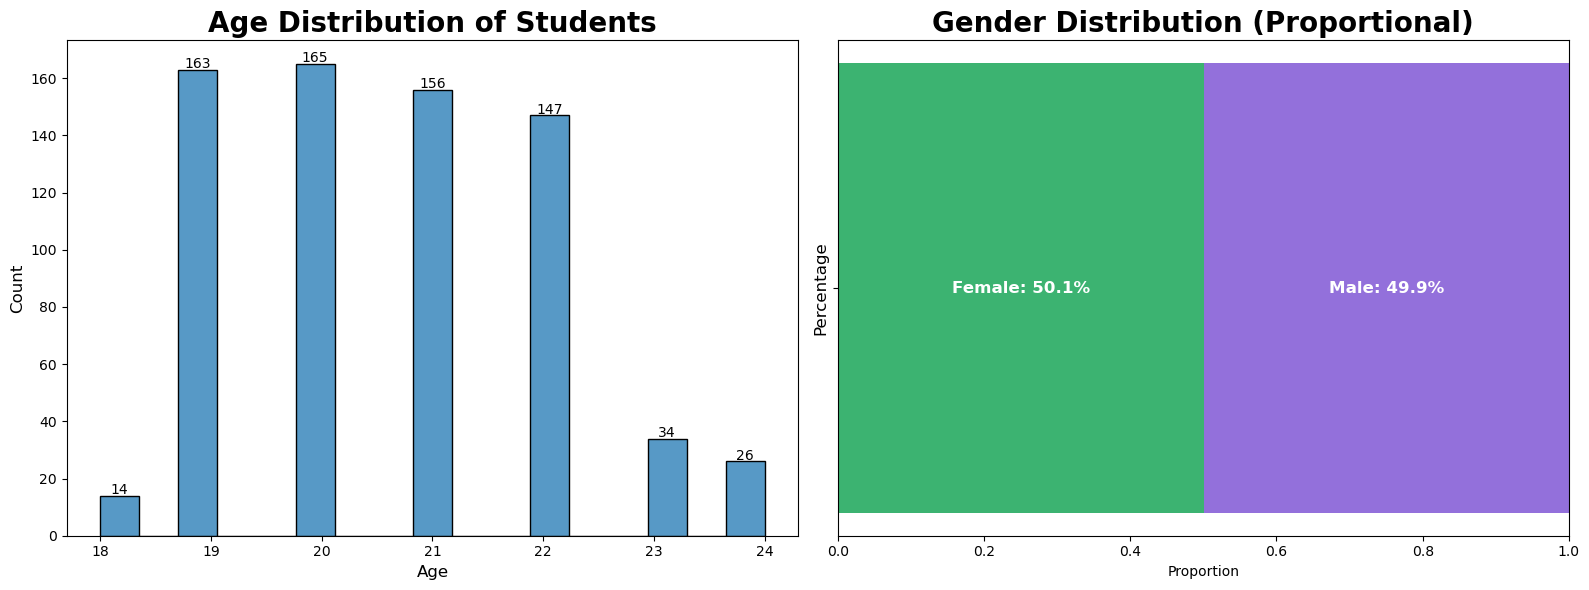

In [123]:
plt.figure(figsize=(16, 6))

# #### Distribution Of Age
plt.subplot(1, 2, 1)
ax = sns.histplot(df['Age'], bins=17)
plt.title('Age Distribution of Students', fontsize=20, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.text(
            patch.get_x() + patch.get_width() / 2,
            height + 0.5,
            f'{int(height)}',
            ha='center',
            fontsize=10
        )

# #### Distribution Of Gender

plt.subplot(1, 2, 2)

gender_counts = df['Gender'].value_counts()
gender_props = gender_counts / gender_counts.sum()

plt.barh(['Percentage'], [gender_props[0]], color='mediumseagreen', label=gender_props.index[0])
plt.barh(['Percentage'], [gender_props[1]], left=[gender_props[0]], color='mediumpurple', label=gender_props.index[1])
plt.yticks([0], ['Percentage'], rotation=90, va='center', fontsize=12)
plt.text(gender_props[0]/2, 0, f"{gender_props.index[0]}: {gender_props[0]*100:.1f}%", ha='center', va='center', fontsize=12, color='white', fontweight='bold')
plt.text(gender_props[0] + gender_props[1]/2, 0, f"{gender_props.index[1]}: {gender_props[1]*100:.1f}%", ha='center', va='center', fontsize=12, color='white', fontweight='bold')
plt.title('Gender Distribution (Proportional)', fontsize=20, fontweight='bold')
plt.xlabel('Proportion')
plt.xlim(0, 1)

plt.tight_layout()
plt.show()

C:\Users\marci\AppData\Local\Temp\ipykernel_2240\3104732229.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




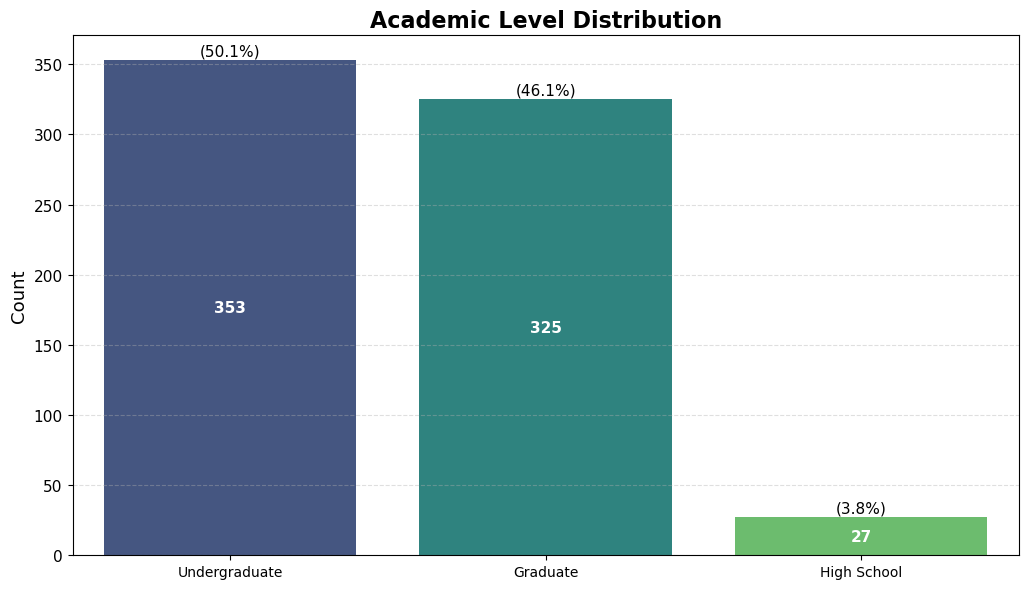

In [124]:
# #### Distribution Of Academic Levels

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 2)
academic_counts = df['Academic_Level'].value_counts()
academic_total = academic_counts.sum()

colors = sns.color_palette('viridis', len(academic_counts))
sns.barplot(x=academic_counts.index, y=academic_counts.values, palette=colors)

for i, v in enumerate(academic_counts.values):
    percentage = (v / academic_total) * 100
    plt.text(i, v * 0.5, str(v), ha='center', va='center', fontsize=11, color='white', fontweight='semibold')
    plt.text(i, v + 1, f"({percentage:.1f}%)", ha='center', va='bottom', fontsize=11, fontweight='medium')

plt.title('Academic Level Distribution', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('Count', fontsize=13)
plt.xticks()
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()

C:\Users\marci\AppData\Local\Temp\ipykernel_2240\1506211400.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




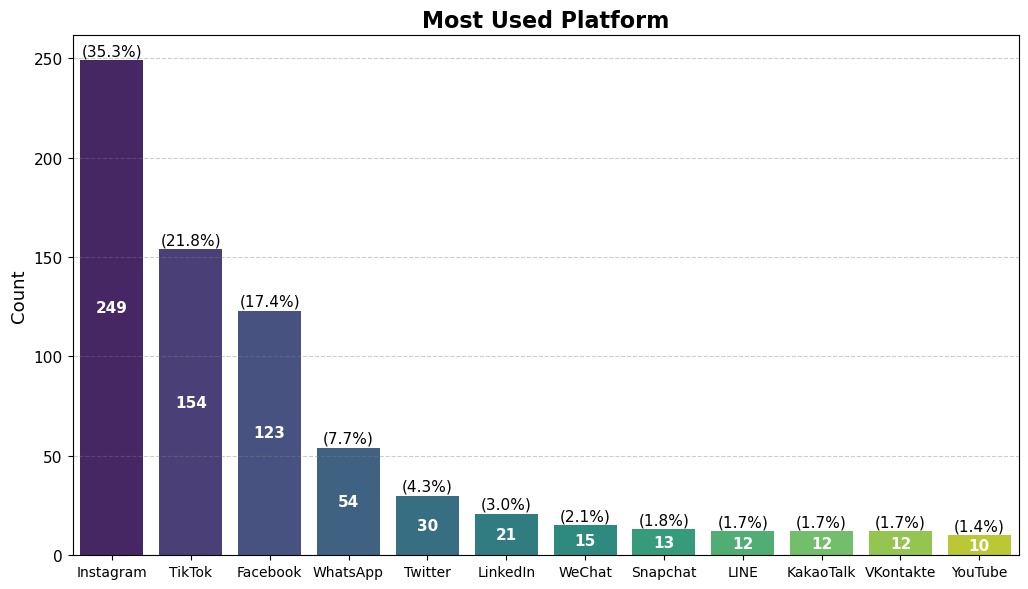

In [125]:
# #### Mostly Used Social Media Platform

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 2)
platform_counts = df['Most_Used_Platform'].value_counts()
platform_total = platform_counts.sum()

colors = sns.color_palette('viridis', len(platform_counts))
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette=colors)

for i, v in enumerate(platform_counts.values):
    percentage = (v / platform_total) * 100
    plt.text(i, v * 0.5, str(v), ha='center', va='center', fontsize=11, color='white', fontweight='semibold')
    plt.text(i, v + 1, f"({percentage:.1f}%)", ha='center', va='bottom', fontsize=11, fontweight='medium')

plt.title('Most Used Platform', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('Count', fontsize=13)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.4, color='grey')

plt.tight_layout()

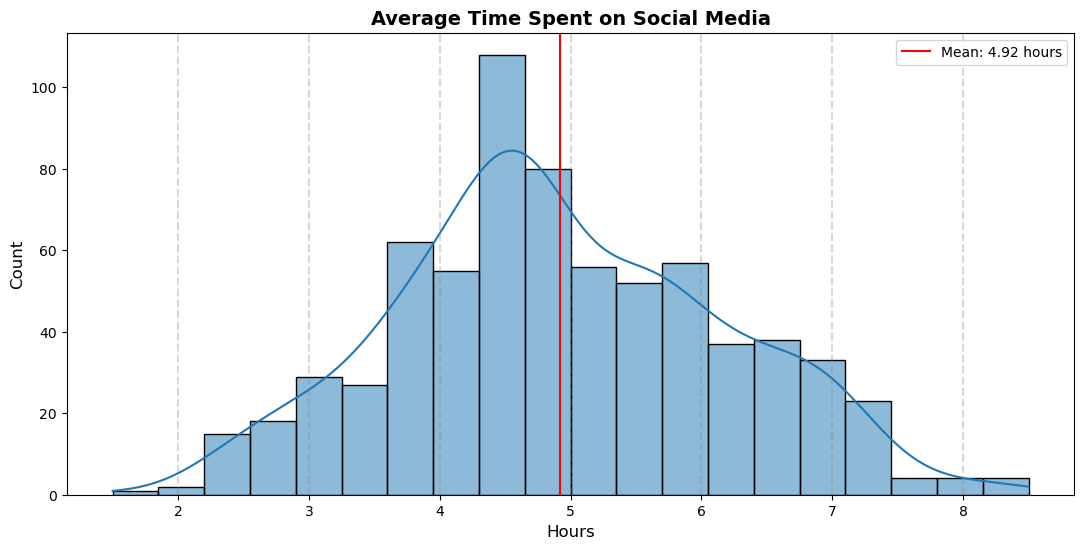

In [126]:
# #### Average Time Spent on Social Media

plt.figure(figsize=(13, 6))

sns.histplot(df['Avg_Daily_Usage_Hours'], kde=True, bins=20)

max_hour = int(df['Avg_Daily_Usage_Hours'].max()) + 1
min_hour = int(df['Avg_Daily_Usage_Hours'].min()) + 1
for hour in range(min_hour, max_hour):
    plt.axvline(hour, color='gray', linestyle='--', alpha=0.3)

plt.title('Average Time Spent on Social Media', fontsize=14, fontweight='bold')
plt.xlabel('Hours', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.axvline(df['Avg_Daily_Usage_Hours'].mean(), color='red', linestyle='-', label=f'Mean: {df["Avg_Daily_Usage_Hours"].mean():.2f} hours')

plt.legend()
plt.show()

C:\Users\marci\AppData\Local\Temp\ipykernel_2240\163262029.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



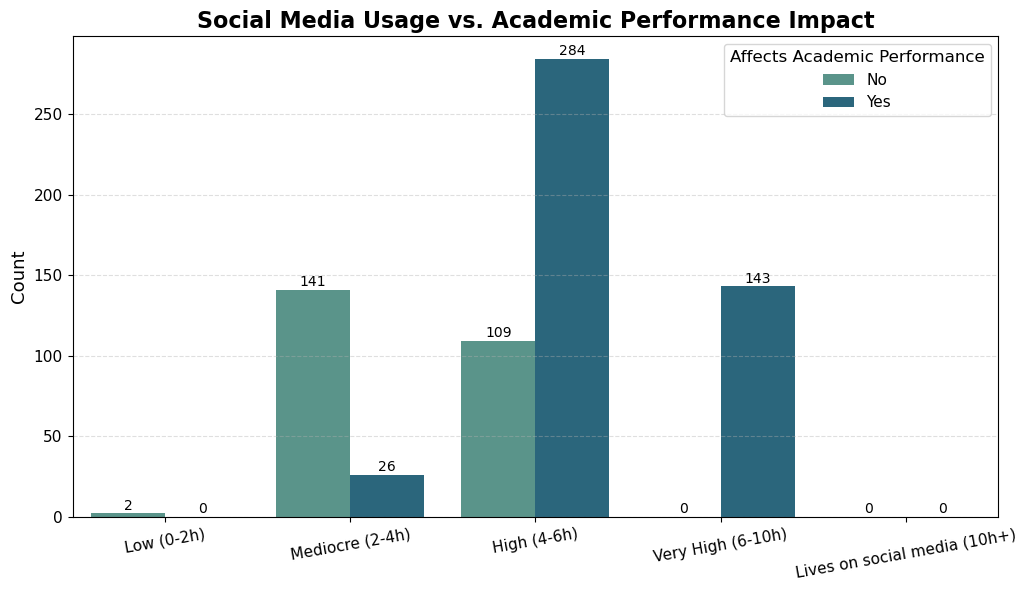

In [127]:
# #### Social Media Usage Impact on Academic Performance 

grouped = df.groupby(['Usage_Category', 'Affects_Academic_Performance']).size().reset_index(name='Count')

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 2)

# Count of people in certain category 
ax = sns.barplot(data=grouped, x='Usage_Category', y='Count', hue='Affects_Academic_Performance', palette='crest')

# Count of people in certain category 
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2
        ax.text(x,height + 0.5,f'{int(height)}',ha='center',va='bottom',color='black',fontsize=10,)

plt.title('Social Media Usage vs. Academic Performance Impact', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('Count', fontsize=13)
plt.xticks(rotation=10, fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title='Affects Academic Performance', title_fontsize=12, fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

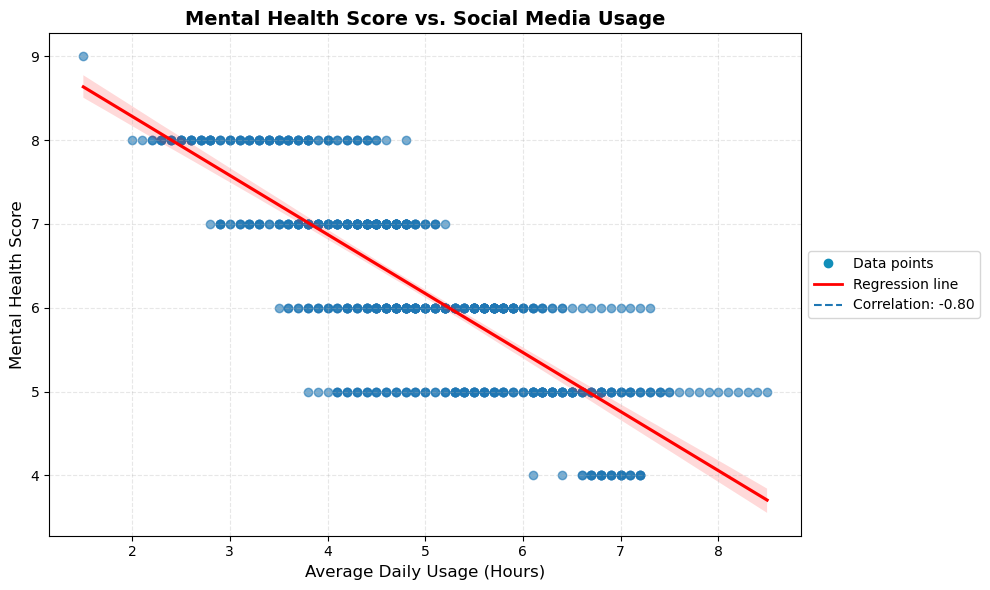

In [128]:
# #### Correlation Between Social Media Use and Mental Health

plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x='Avg_Daily_Usage_Hours',
    y='Mental_Health_Score',
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)

correlation = df['Mental_Health_Score'].corr(df['Avg_Daily_Usage_Hours'])
correlation_label = f'Correlation: {correlation:.2f}'

legend_elements = [
    Line2D([0], [0], marker='o', color='#118eb9', label='Data points', linestyle=''),
    Line2D([0], [0], color='red', lw=2, label='Regression line'),
    Line2D([], [], linestyle='--', label=correlation_label)
]

plt.legend(
    handles=legend_elements,
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)

plt.title('Mental Health Score vs. Social Media Usage', fontsize=14, fontweight='bold')
plt.xlabel('Average Daily Usage (Hours)', fontsize=12)
plt.ylabel('Mental Health Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

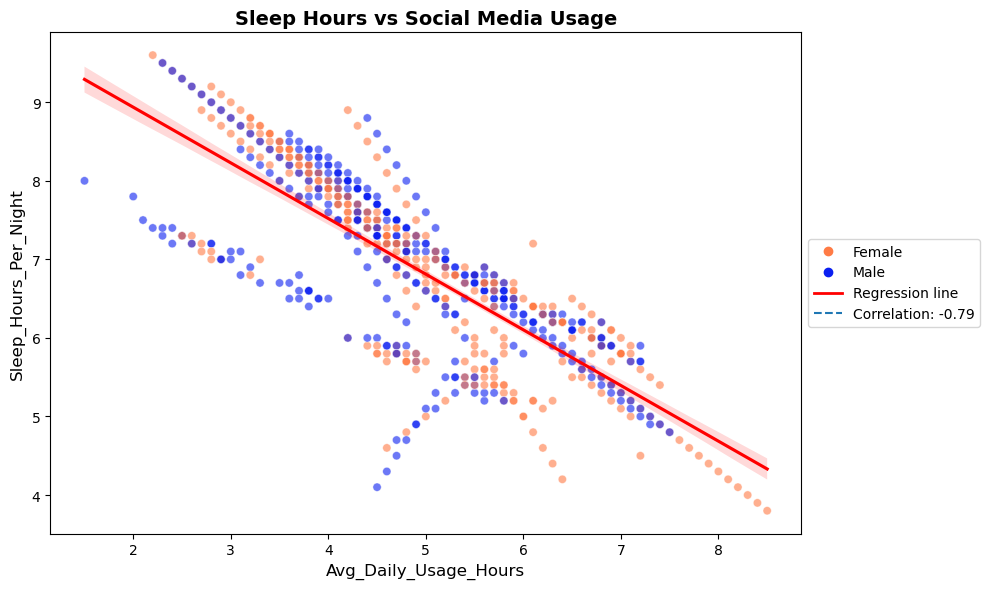

In [129]:
# #### Correlation between amount of Sleep Hours and Social Media Usage

plt.figure(figsize=(10, 6))

sns.scatterplot(x='Avg_Daily_Usage_Hours',
                y='Sleep_Hours_Per_Night',
                data=df,
                alpha=0.6,
                hue='Gender',
                palette={'Female': '#ff7b45', 'Male': '#0a1ff1'},
                legend=False)

plt.title('Sleep Hours vs Social Media Usage', fontsize=14, fontweight='bold')
plt.xlabel('Average Daily Usage Hours', fontsize=12)
plt.ylabel('Sleep Hours Per Night', fontsize=12)

sns.regplot(x='Avg_Daily_Usage_Hours', y='Sleep_Hours_Per_Night', data=df, scatter=False, color='red')

correlation = df['Avg_Daily_Usage_Hours'].corr(df['Sleep_Hours_Per_Night'])
correlation_label = f'Correlation: {correlation:.2f}'

legend_elements = [
    Line2D([0], [0], marker='o', color='#ff7b45', label='Female', linestyle=''),
    Line2D([0], [0], marker='o', color='#0a1ff1', label='Male', linestyle=''),
    Line2D([0], [0], color='red', lw=2, label='Regression line'),
    Line2D([], [], linestyle='--', label=correlation_label)
]

plt.legend(
    handles=legend_elements,
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)

plt.tight_layout()
plt.show()

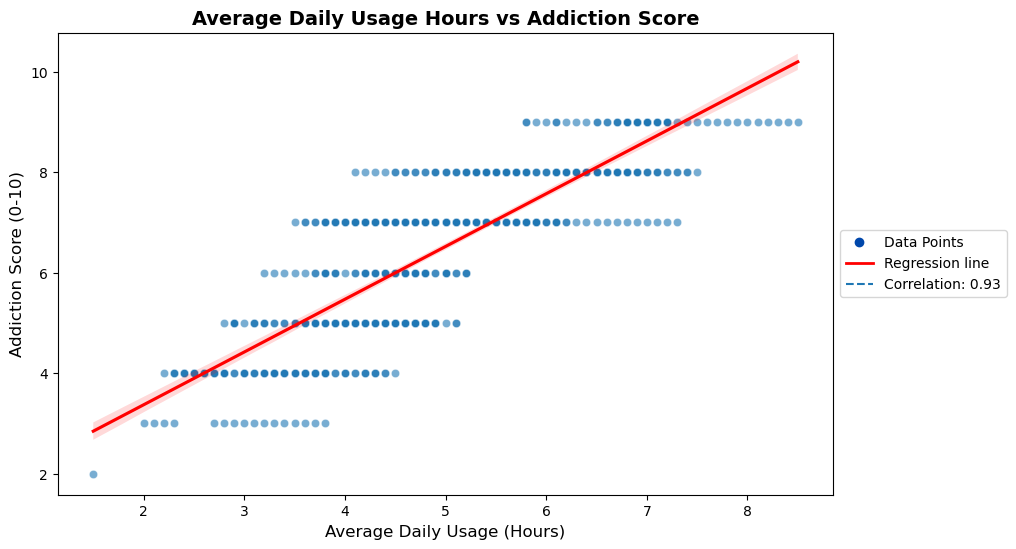

In [130]:
# Social Media Addiction Impact On Mental Health 

plt.figure(figsize=(10, 6))

sns.scatterplot(x='Avg_Daily_Usage_Hours', y='Addicted_Score', data=df, alpha=0.6)
sns.regplot(x='Avg_Daily_Usage_Hours', y='Addicted_Score', data=df, scatter=False, color='red')

correlation = df['Addicted_Score'].corr(df['Conflicts_Over_Social_Media'])
correlation_label = f'Correlation: {correlation:.2f}'

legend_elements = [
    Line2D([0], [0], marker='o', color='#0047AB', label='Data Points', linestyle=''),
    Line2D([0], [0], color='red', lw=2, label='Regression line'),
    Line2D([], [], linestyle='--', label=correlation_label)
]

plt.legend(
    handles=legend_elements,
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)

plt.title('Average Daily Usage Hours vs Addiction Score', fontsize=14, fontweight='bold')
plt.xlabel('Average Daily Usage (Hours)', fontsize=12)
plt.ylabel('Addiction Score (0-10)', fontsize=12)

plt.show()

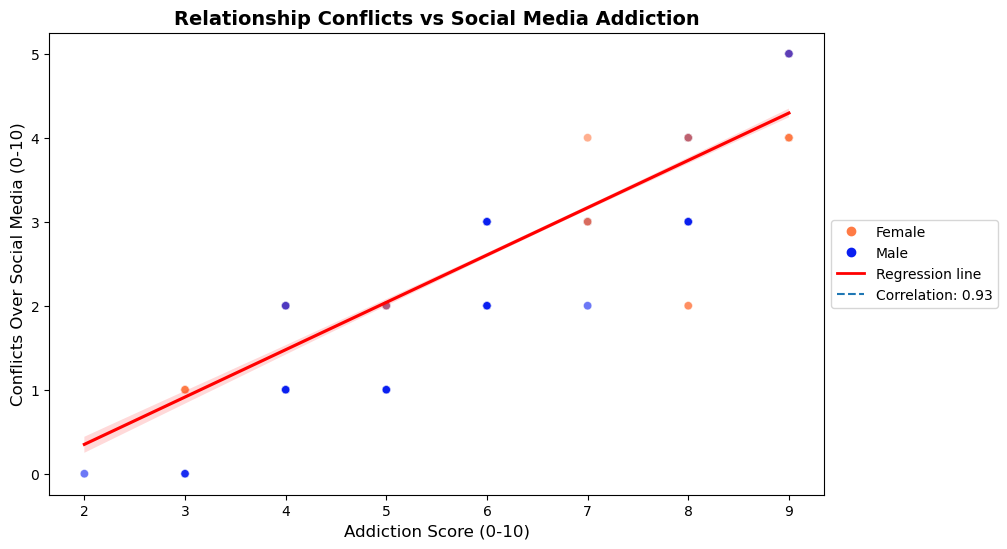

In [132]:
# #### Social Media Addiction vs Relationship Conflicts

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Addicted_Score', y='Conflicts_Over_Social_Media', data=df, alpha=0.6, hue='Gender', palette={'Female': '#ff7b45', 'Male': '#0a1ff1'})

sns.regplot(x='Addicted_Score', y='Conflicts_Over_Social_Media', data=df, scatter=False, color='red')

correlation = df['Addicted_Score'].corr(df['Conflicts_Over_Social_Media'])
correlation_label = f'Correlation: {correlation:.2f}'

legend_elements = [
    Line2D([0], [0], marker='o', color='#ff7b45', label='Female', linestyle=''),
    Line2D([0], [0], marker='o', color='#0a1ff1', label='Male', linestyle=''),
    Line2D([0], [0], color='red', lw=2, label='Regression line'),
    Line2D([], [], linestyle='--', label=correlation_label)
]

plt.legend(
    handles=legend_elements,
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)

plt.title('Relationship Conflicts vs Social Media Addiction', fontsize=14, fontweight='bold')
plt.xlabel('Addiction Score (0-10)', fontsize=12)
plt.ylabel('Conflicts Over Social Media (0-10)', fontsize=12)

plt.show()

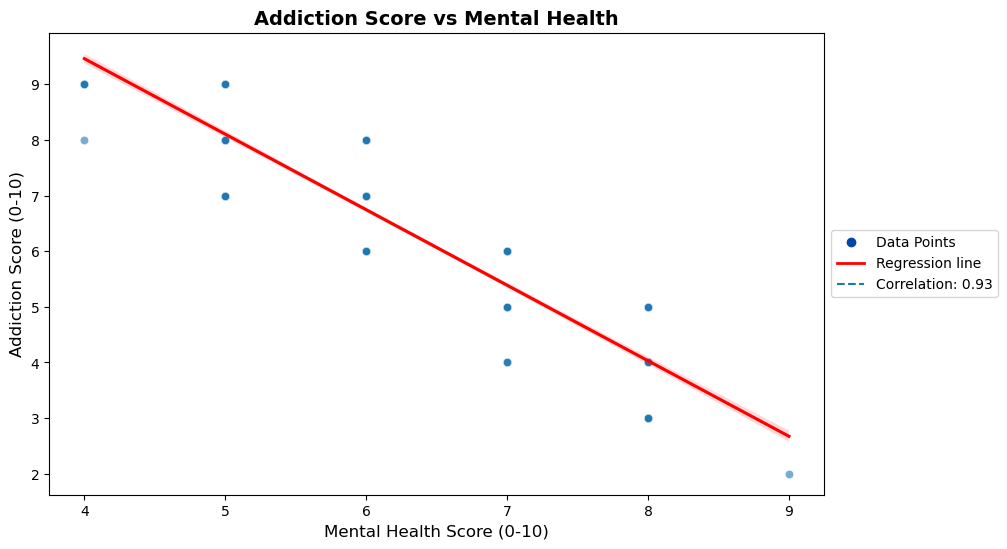

In [136]:
# Social Media Addiction Impact On Mental Health 

plt.figure(figsize=(10, 6))

sns.scatterplot(x='Mental_Health_Score', y='Addicted_Score', data=df, alpha=0.6)
sns.regplot(x='Mental_Health_Score', y='Addicted_Score', data=df, scatter=False, color='red')

correlation = df['Addicted_Score'].corr(df['Conflicts_Over_Social_Media'])
correlation_label = f'Correlation: {correlation:.2f}'

legend_elements = [
    Line2D([0], [0], marker='o', color='#0047AB', label='Data Points', linestyle=''),
    Line2D([0], [0], color='red', lw=2, label='Regression line'),
    Line2D([], [], linestyle='--', label=correlation_label)
]

plt.legend(
    handles=legend_elements,
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)

plt.title('Addiction Score vs Mental Health', fontsize=14, fontweight='bold')
plt.xlabel('Mental Health Score (0-10)', fontsize=12)
plt.ylabel('Addiction Score (0-10)', fontsize=12)

plt.show()

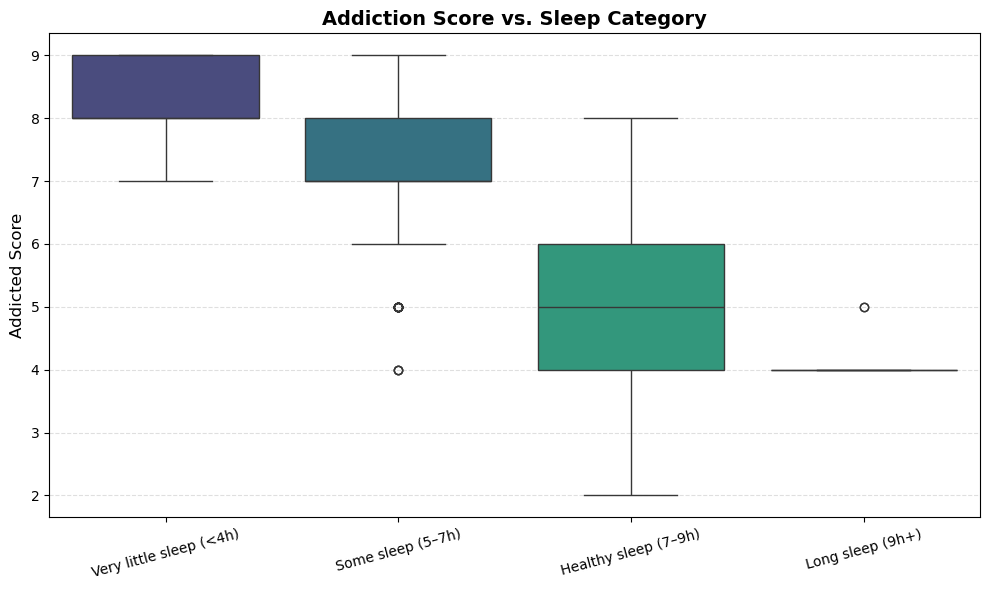

In [138]:
# #### Addiction Score by Sleep Category

plt.figure(figsize=(10, 6))
sns.boxplot(x='Sleep_Category', y='Addicted_Score', data=df, hue = 'Sleep_Category', palette='viridis')

plt.title('Addiction Score vs. Sleep Category', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Addicted Score', fontsize=12)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [141]:
# #### Most addicted countries

score_by_country = df.groupby('Country')['Addicted_Score'].sum().reset_index()

fig = px.choropleth(
    score_by_country,
    locations='Country',
    locationmode='country names',
    color='Addicted_Score',
    color_continuous_scale='Viridis_r',
    title="Addiction Score by Country"
)
fig.show(renderer='iframe')